# **1-3. 마켓과 머신러닝**

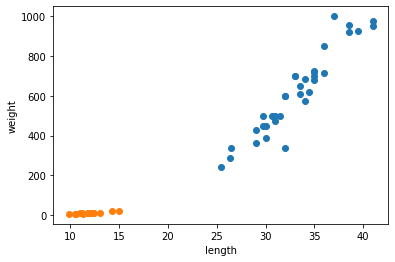

In [ ]:
# 35마리의 도미 데이터
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# 14마리의 빙어 데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

import matplotlib.pyplot as plt

plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

fish_data = [[l,w] for l,w in zip(length,weight)]
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [ ]:
fish_target = [1]*35 + [0]*14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier # 사이킷런 패키지에서 k-최근접 이웃 알고리즘을 구현한 클래스인 KNeighborsClassifier를 임포트

kn = KNeighborsClassifier() # KNeighborsClassifier 클래스의 객체 만들기
kn.fit(fish_data, fish_target) # fit() 메서드 : 주어진 데이터로 알고리즘을 훈련
kn.score(fish_data, fish_target) # score() 메서드 : 모델을 평가 => 0 ~ 1 사이의 값을 반환(1 = 모든 데이터가 정확)

### 여기서 출력 값 = 정확도(accuracy)


1.0

In [ ]:
kn.predict([[30,600]]) # predict() 메서드 : 새로운 데이터의 정답을 예측 => fit() 메서드와 마찬가지로 리스트의 리스트를 전달

array([1])

In [ ]:
kn49 = KNeighborsClassifier(n_neighbors=49) # 참고 데이터를 49개로 한 kn49 모델
kn49.fit(fish_data,fish_target)
kn49.score(fish_data,fish_target)

### KNeighborsClassifier의 기본값은 5 => 모든 데이터를 사용하여 예측을 하면, 더 많은 데이터를 가진 '도미'로 예측함!

0.7142857142857143

# **2-1. 훈련 세트와 테스트 세트**

In [ ]:
# 도미와 빙어의 데이터(49개의 샘플)
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l,w] for l,w in zip(fish_length,fish_weight)] # 각 생선의 길이와 무게를 하나의 리스트로 담은 2차원 리스트
fish_target = [1]*35 + [0]*14

# 사이킷런 임포트, 모델 객체 만들기
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

# 처음 35개 샘플을 훈련 세트로 선택, 나머지 14개 샘플을 테스트 세트로 선택
train_input = fish_data[:35] # 훈련 세트로 입력값 중 0~34번째 인덱스까지 사용
train_target = fish_target[:35] # 훈련 세트로 타깃값 중 0~34번째 인덱스까지 사용
test_input = fish_data[35:]
test_target = fish_target[35:]

kn = kn.fit(train_input,train_target) # 모델 훈련
kn.score(test_input,test_target) # 평가

0.0

(49, 2)


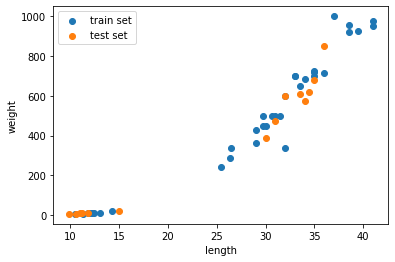

In [ ]:
# numpy 도입해서, 고차원의 배열 만들기
import numpy as np
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)
print(input_arr.shape) # (샘플 수(행ㅡ), 특성 수(열ㅣ)) 을 출력

np.random.seed(42) # 일정한 결과를 얻기 위해 초기에 랜덤 시드(random seed)를 지정
index = np.arange(49)
np.random.shuffle(index) #주어진 배열 무작위로 섞기

# 랜덤하게 35개의 샘플을 훈련 세트, 나머지 14개를 테스트 세트로 만들기
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(test_input[:,0],test_input[:,1])
plt.legend(['train set','test set'])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 샘플이 골고루 섞여 있게끔 훈련 세트와 테스트 세트를 만든 후 -> 머신러닝 평가
kn = kn.fit(train_input,train_target) # 모델 훈련
kn.score(test_input,test_target) # 평가

1.0

#**2-2. 데이터 전처리**

In [2]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

import numpy as np
fish_data = np.column_stack((fish_length,fish_weight))
fish_target = np.concatenate((np.ones(35),np.zeros(14)))

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data,fish_target,stratify=fish_target,random_state=42)

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input,train_target)
kn.score(test_input,test_target)

[[  29.7  500. ]
 [  12.2   12.2]
 [  33.   700. ]
 [  11.3    8.7]
 [  39.5  925. ]
 [  29.   430. ]
 [  36.   714. ]
 [  36.   850. ]
 [  31.   475. ]
 [  35.   720. ]
 [  37.  1000. ]
 [  11.2    9.8]
 [  34.5  620. ]
 [  12.     9.8]
 [  29.   363. ]
 [  33.   700. ]
 [  30.7  500. ]
 [  38.5  955. ]
 [  33.5  650. ]
 [  14.3   19.7]
 [  31.5  500. ]
 [  25.4  242. ]
 [   9.8    6.7]
 [  32.   600. ]
 [  10.5    7.5]
 [  33.5  610. ]
 [  10.6    7. ]
 [  35.   700. ]
 [  32.   600. ]
 [  35.   725. ]
 [  13.    12.2]
 [  30.   450. ]
 [  32.   340. ]
 [  15.    19.9]
 [  30.   390. ]
 [  41.   975. ]]


1.0

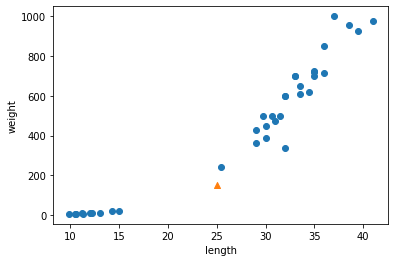

In [ ]:
#예외의 데이터 (25,150)
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

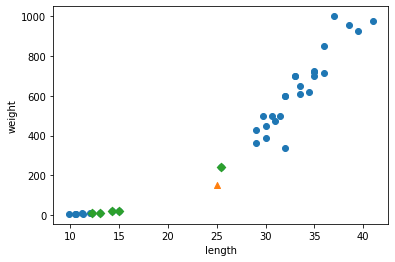

In [ ]:
# 예외의 샘플의 주변 샘플 알아보기
distances, indexes = kn.kneighbors([[25,150]])

plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [3]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

#표준점수
train_scaled = (train_input - mean) / std

# 예외 데이터도 표준점수 계산해주기
new = ([25,150] - mean) / std

# 전처리 데이터로 모델 훈련하기
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

[ 27.29722222 454.09722222]


NameError: ignored

[1.]


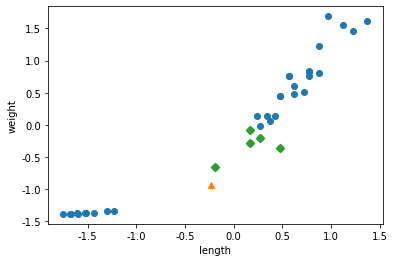

In [ ]:
# 데이터 전처리한 후 모델 평가
kn.fit(train_scaled, train_target) # 모델 훈련
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target) # 평가
print(kn.predict([new]))

# 데이터 전처리한 후 모델 평가 그래프
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# **3-1. k-최근접 이웃 회귀**

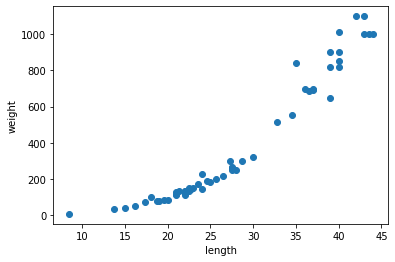

(42,) (14,)
(42, 1) (14, 1)


In [ ]:
import numpy as np

# 농어의 길이(특성)와 무게(타깃)
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

# 데이터 형태 보기
import matplotlib.pyplot as plt
plt.scatter(perch_length,perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length,perch_weight,random_state=42)
  ### random_state는 책과 결과를 동일하게 유지하기 위함

# 사이킷런에 사용할 훈련 세트는 2차원 배열이어야 함!
print(train_input.shape, test_input.shape) # shape : 배열의 크기 출력
train_input=train_input.reshape(-1,1) # reshape : 배열의 크기 원하는 형태로 바꾸기
test_input=test_input.reshape(-1,1) # 크기에 -1 : 나머지 원소 개수로 모두 채움
print(train_input.shape, test_input.shape)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr=KNeighborsRegressor()

# k-최근접 이웃 회귀 모델을 훈련
knr.fit(train_input,train_target)

# 테스트 세트(test set)의 점수 확인
print(knr.score(test_input,test_target)) # 결정계수

from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측 만들기
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차 계산
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

0.992809406101064
19.157142857142862


In [ ]:
# 훈련 세트(train set)의 점수 확인
print(knr.score(train_input,train_target))

# 테스트 세트(test set)의 점수 확인
print(knr.score(test_input,test_target))

0.9698823289099254
0.992809406101064


In [ ]:
# k-최근접 이웃 알고리즘으로 모델을 더 복잡하게 만드는 방법 : k를 줄이는 것
# 이웃의 개수 k를 3으로 설정(기본값=5)
knr.n_neighbors = 3

# 모델을 다시 훈련
knr.fit(train_input, train_target)

# 훈련 세트(train set)의 점수 확인
print(knr.score(train_input,train_target))

# 테스트 세트(test set)의 점수 확인
print(knr.score(test_input,test_target))

0.9804899950518966
0.9746459963987609


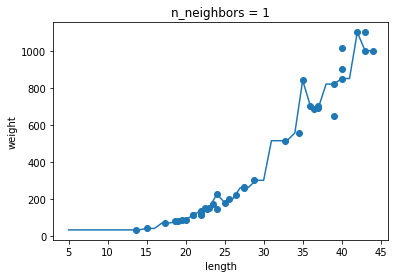

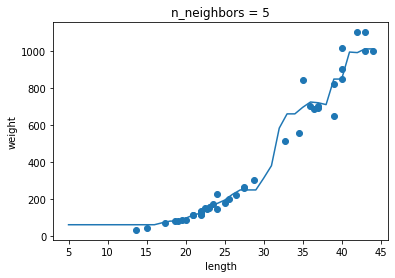

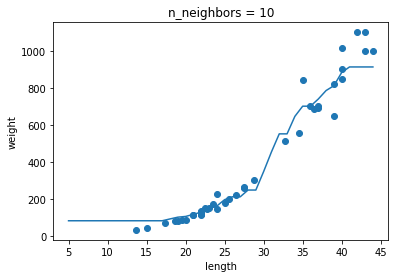

In [ ]:
# 과대적합과 과소적합에 대한 이해를 돕기 위해 복잡한 모델과 단순한 모델 만들기

# k-최근접 이웃 회귀 객체 만들기
knr = KNeighborsRegressor()

# 5 ~ 45까지 x좌표 만들기
x = np.arange(5,45).reshape(-1,1)

# n = 1, 5, 10일 때 예측 결과를 그래프로 
for n in [1,5,10]:

  # 모델을 훈련
  knr.n_neighbors = n
  knr.fit(train_input,train_target)

  # 지정한 범위 x에 대한 예측
  prediction = knr.predict(x)

  # 훈련 세트와 예측 결과를 그래프로
  plt.scatter(train_input, train_target)
  plt.plot(x,prediction)
  plt.title('n_neighbors = %d'%(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()

# **3-2. 선형 회귀**

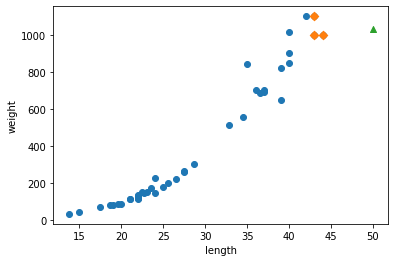

In [ ]:
import numpy as np
# 농어의 길이(특성)와 무게(타깃)
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

from sklearn.model_selection import train_test_split
# 훈련 세트와 테스트 세트로 나누기
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
# 훈련 세트와 테스트 세트를 2차원 배열로 바꾸기
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
# k-최근접 이웃 회귀 모델을 훈련
knr.fit(train_input, train_target)

import matplotlib.pyplot as plt
# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)

# 50cm 농어의 이웃을 구하기
distances, indexes = knr.kneighbors([[50]])
# 훈련 세트 중에서 이웃 샘플만 다시 그리기
plt.scatter(train_input[indexes], train_target[indexes],marker='D')

# 50cm 농어 데이터
plt.scatter(50,knr.predict([[50]]),marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

[1241.83860323]
[39.01714496] -709.0186449535477


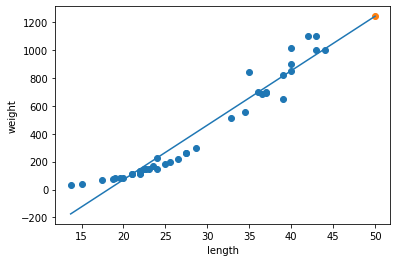

0.939846333997604
0.8247503123313558


In [ ]:
# 선형 회귀
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# 선형 회귀 모델을 훈련
lr.fit(train_input,train_target)

# 50cm 농어에 대해 예측
print(lr.predict([[50]]))
# lr 객체의 기울기(coefficient), y절편(intercept)
print(lr.coef_,lr.intercept_)

# 훈련 세트의 산점도
plt.scatter(train_input, train_target)

# 제일 작은 훈련 세트의 길이 ~ 50까지 선형 회귀(1차 방정식) 그래프 그리기
plt.plot([np.min(train_input),50],[np.min(train_input)*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50,lr.predict([[50]]))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 훈련 세트의 점수 확인
print(lr.score(train_input, train_target))
# 테스트 세트의 점수 확인
print(lr.score(test_input, test_target))

(42, 2) (14, 2)
[1573.98423528]
[  1.01433211 -21.55792498] 116.0502107827827


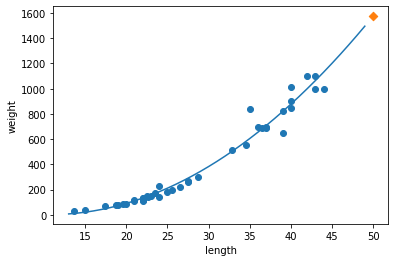

0.9706807451768623
0.9775935108325122


In [ ]:
# 2차 방정식의 그래프를 그리기 위해, 길이를 제곱한 항 추가
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2,test_input))
print(train_poly.shape, test_poly.shape)

# 선형 회귀 모델 다시 훈련
lr = LinearRegression()
lr.fit(train_poly, train_target)

# 50cm짜리 농어의 무게 예측
print(lr.predict([[50**2, 50]]))
# 모델의 계수, y절편
print(lr.coef_,lr.intercept_)

# 구간별 직선을 그리기 위해 length 정수 배열
point = np.arange(np.trunc(np.min(train_input)),50)

# 훈련 세트의 산점도
plt.scatter(train_input, train_target)
# 2차 방정식 그래프
plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_)
# 50cm 농어 데이터
plt.scatter(50,lr.predict(([[50**2,50]])),marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 훈련 세트의 점수 확인
print(lr.score(train_poly, train_target))
# 테스트 세트의 점수 확인
print(lr.score(test_poly, test_target))

# **3-3. 특성 공학과 규제**

In [ ]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
# 농어의 길이, 높이, 두께 데이터 => 훈련 세트
perch_full = df.to_numpy()

import numpy as np
# 농어의 무게 데이터 => 테스트 세트
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

# perch_full과 perch_weight를 훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [ ]:
# 변환기
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False)

# 새롭게 만들 특성 조합 찾기
poly.fit(train_input)

# train_input 데이터 변환
train_poly = poly.transform(train_input)
print(train_poly.shape)

#특성의 입력 조합 출력
poly.get_feature_names_out()

# test_input 데이터 변환
test_poly = poly.transform(test_input)

(42, 9)


In [ ]:
# 여러 개의 특성을 사용하여 선형 회귀 수행
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly,train_target)

# 훈련 세트의 점수 확인
print(lr.score(train_poly,train_target))
# 테스트 세트의 점수 확인
print(lr.score(test_poly,test_target))


0.9903183436982124
0.9714559911594134


In [ ]:
# 5제곱까지 특성을 만들어서 출력
poly = PolynomialFeatures(degree=5,include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

lr.fit(train_poly,train_target)
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

(42, 55)
0.9999999999991097
-144.40579242684848


In [ ]:
# 규제 적용 전 정규화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

0.9896101671037343
0.9790693977615397


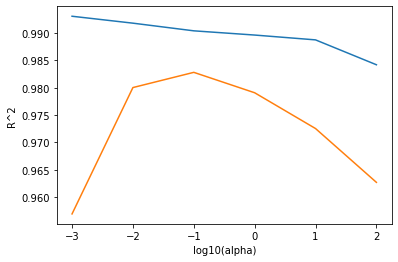

0.9903815817570366
0.9827976465386926


In [ ]:
# 릿지 회귀
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

# alpha 매개변수 찾기
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  # 릿지 모델 만들기
  ridge = Ridge(alpha=alpha)
  # 릿지 모델 훈련
  ridge.fit(train_scaled, train_target)
  # 훈련 점수와 테스트 점수 저장
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('log10(alpha)')
plt.ylabel('R^2')
plt.show()

# alpha매개변수 적용 릿지 회귀
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


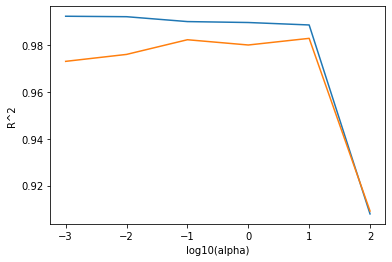

0.9888067471131867
0.9824470598706695


In [ ]:
# 라쏘 회귀
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

# alpha 매개변수 찾기
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  # 라쏘 모델 만들기
  lasso = Lasso(alpha=alpha, max_iter=10000) ### max_iter 매개변수 : 반복 횟수 지정
  # 라쏘 모델 훈련
  lasso.fit(train_scaled, train_target)
  # 훈련 점수와 테스트 점수 저장
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('log10(alpha)')
plt.ylabel('R^2')
plt.show()

# alpha매개변수 적용 라쏘 회귀
lasso = Lasso(alpha=10)
lasso.fit(train_scaled,train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

In [ ]:
# 라쏘 모델에서 계수 값이 0인 개수
print(np.sum(lasso.coef_ == 0))

40
